In [26]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 1. Анализ обрабатываемых данных

In [27]:
df = pd.read_csv('weatherAUS.csv')

In [28]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [29]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [6]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

# 2. Разделение признаков

In [7]:
numerical_features = df[[col for col in df if df[col].dtype == 'float64']] #выделение численных признаков

In [8]:
numerical_features.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RISK_MM          float64
dtype: object

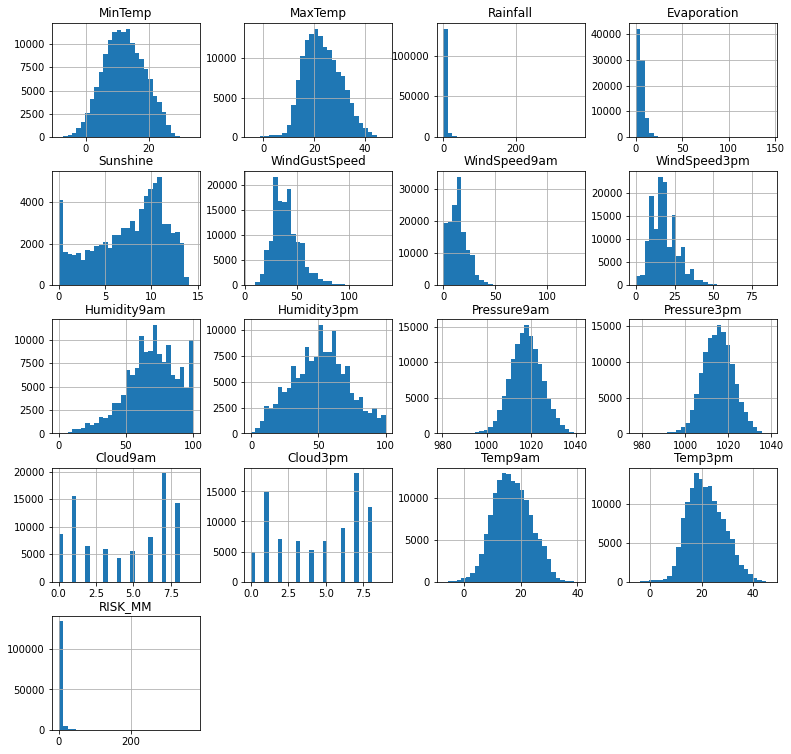

In [9]:
numerical_features.hist(figsize = (13, 13), bins = 30)
plt.show()

Как мы видим, многие признаки имеют распределение, похожее на нормальное. Значит, будем заменять пропуски в них на среднее значение.

In [10]:
nominal_features = df[[col for col in df if df[col].dtype == 'object']]
nominal_features.dtypes

Date            object
Location        object
WindGustDir     object
WindDir9am      object
WindDir3pm      object
RainToday       object
RainTomorrow    object
dtype: object

# 3. Обработка данных

In [11]:
def data_preparation(nominal, numerical):
    numerical_new = numerical.copy()
    median = numerical_new.median()
    mean = numerical_new.mean()
    numerical_new.fillna(median, inplace = True)
    deviation = numerical_new.std()
    numerical_new = (numerical_new - mean) / deviation #нормализация данных

    nominal_new = nominal.copy()
    months = nominal_new['Date'].str.split(pat = '-', expand = True)[1].rename('Month') # создание признака месяц года
    nominal_new = pd.concat([months, nominal_new], axis = 1)
    for col in nominal_new.columns:
        mode = nominal_new[col].mode()[0]
        nominal_new[col].fillna(mode, inplace = True)
    encoder = OrdinalEncoder().fit_transform(nominal_new)
    nominal_new[nominal_new.columns] = encoder
    
    df_new = pd.concat([nominal_new, numerical_new], axis = 1).drop('Date', axis = 1)
    return df_new

df_prep = data_preparation(nominal_features, numerical_features)
df_prep

,Month,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,MinTemp,MaxTemp,Rainfall,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,11.0,2.0,13.0,13.0,14.0,0.0,0.0,0.189953,-0.045964,-0.207677,...,0.614838,0.113888,-1.435919,-1.475447,-1.220957,1.552858,0.234493,-0.013521,0.016411,-0.278449
1,11.0,2.0,14.0,6.0,15.0,0.0,0.0,-0.749170,0.263476,-0.278881,...,0.385524,-1.312230,-1.289807,-1.045579,-1.116195,0.245302,0.234493,0.032831,0.380246,-0.278449
2,11.0,2.0,15.0,13.0,15.0,0.0,0.0,0.111693,0.347869,-0.278881,...,0.844151,-1.629145,-1.046287,-1.490270,-0.981501,0.245302,-1.181434,0.619957,0.220159,-0.278449
3,11.0,2.0,4.0,9.0,0.0,0.0,0.0,-0.467433,0.671375,-0.278881,...,-1.105013,-1.259411,-1.728142,-0.007969,-0.367895,0.245302,0.234493,0.171888,0.700421,-0.160496
4,11.0,2.0,13.0,1.0,7.0,0.0,0.0,0.831688,1.276189,-0.160207,...,0.156211,0.694899,-0.900175,-1.015933,-1.385583,1.117006,1.650420,0.125535,1.166130,-0.254858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,5.0,41.0,0.0,2.0,0.0,0.0,0.0,-1.359600,-0.200684,-0.278881,...,-0.646386,-0.519942,-1.192399,1.044465,0.889250,0.245302,0.234493,-1.172322,-0.114570,-0.278449
142189,5.0,41.0,0.0,9.0,1.0,0.0,0.0,-1.469165,0.024364,-0.278881,...,-0.875699,-0.942496,-1.338511,1.029642,0.754555,0.245302,0.234493,-1.064167,0.103732,-0.278449
142190,5.0,41.0,6.0,9.0,3.0,0.0,0.0,-1.343948,0.291607,-0.278881,...,-1.105013,-0.678400,-1.484623,0.866589,0.574963,0.245302,0.234493,-0.940562,0.409353,-0.278449
142191,5.0,41.0,3.0,9.0,14.0,0.0,0.0,-1.062211,0.516655,-0.278881,...,-1.105013,-0.836857,-1.338511,0.496014,0.230745,0.245302,0.234493,-0.693351,0.642208,-0.278449


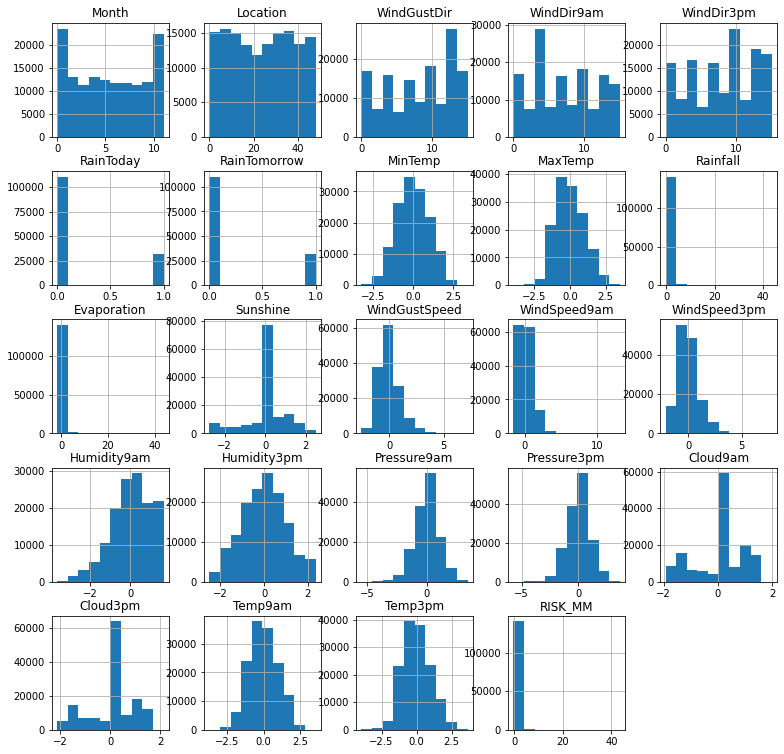

In [12]:
df_prep.hist(figsize = (13, 13))
plt.show()

# 4. Удаление коррелированных признаков

<AxesSubplot:>

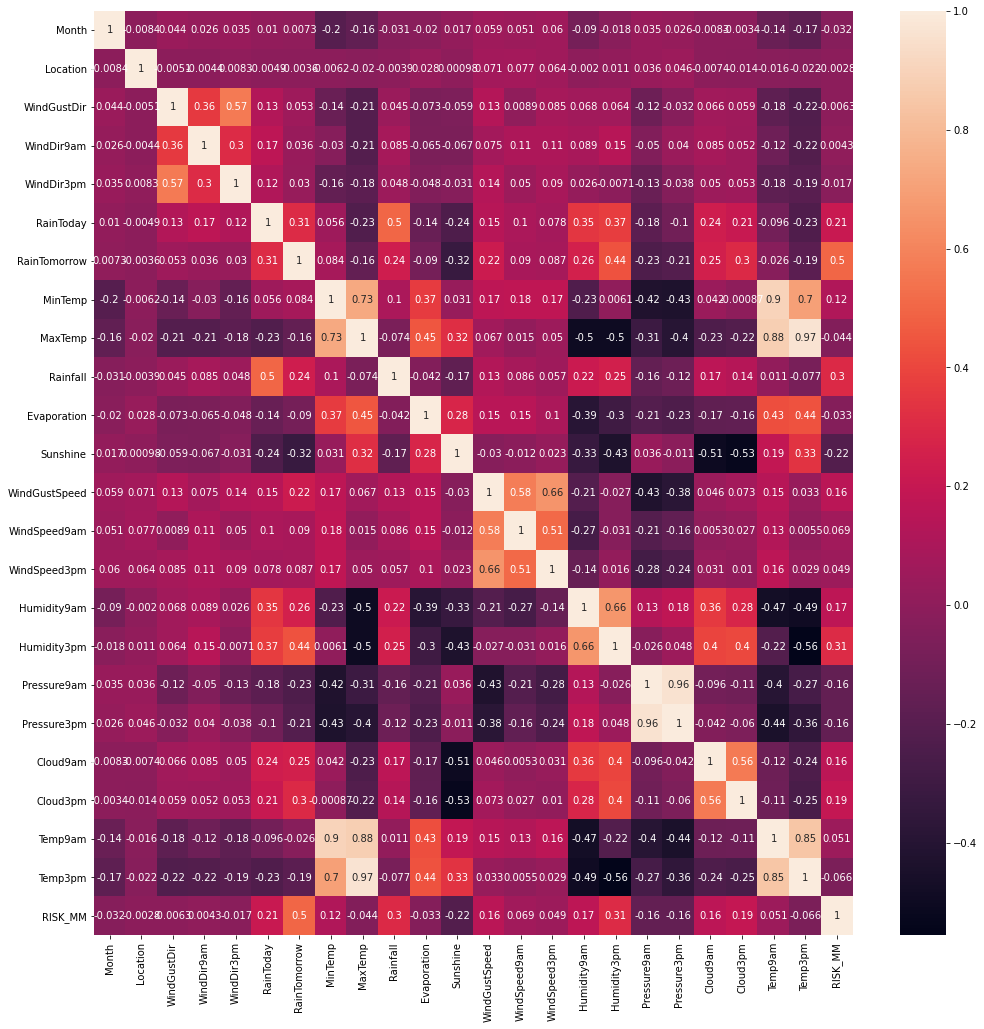

In [13]:
plt.figure(figsize = (17, 17))
sns.heatmap(df_prep.corr(), annot = True)

Взглянем на матрицу корреляции и удалим сильно сколеррированные признаки, для улучшение быстродействия и наилучшей работы на некоторых классификаторах. Краткое объяснение как убирались признаки: 
- Temp9am, Temp3pm так как они высоко коррелированы с минимальной и максимальной температурой, что абсолютно логичная, ведь наименьшая температура как правило прослеживается утром, а максимальная соответственно в полдень
- MinTemp удалилась по причине высокой коррелированности с максимальной температурой и, по моему мнению, максимальная температура нам важнее, что и было получено мной на практике
- WindDir9am, WindDir3pm высокая корреляция с WindGustDir и не содержательность признака
- Humidity9am, Cloud9am, Pressure9am удалились из-за корреляции с теми же показателями в полдень, которые нам важнее, на машине получается лучший результат
- Sunshie высокая корреляции c Cloud3pm

In [14]:
df_prep.drop(['Temp9am', 'Temp3pm','Pressure9am', \
              'MinTemp', 'WindSpeed9am','WindSpeed3pm',\
              'WindDir9am', 'WindDir3pm', 'Humidity9am', 'Cloud9am', 'Sunshine'], axis = 1, inplace = True)

<AxesSubplot:>

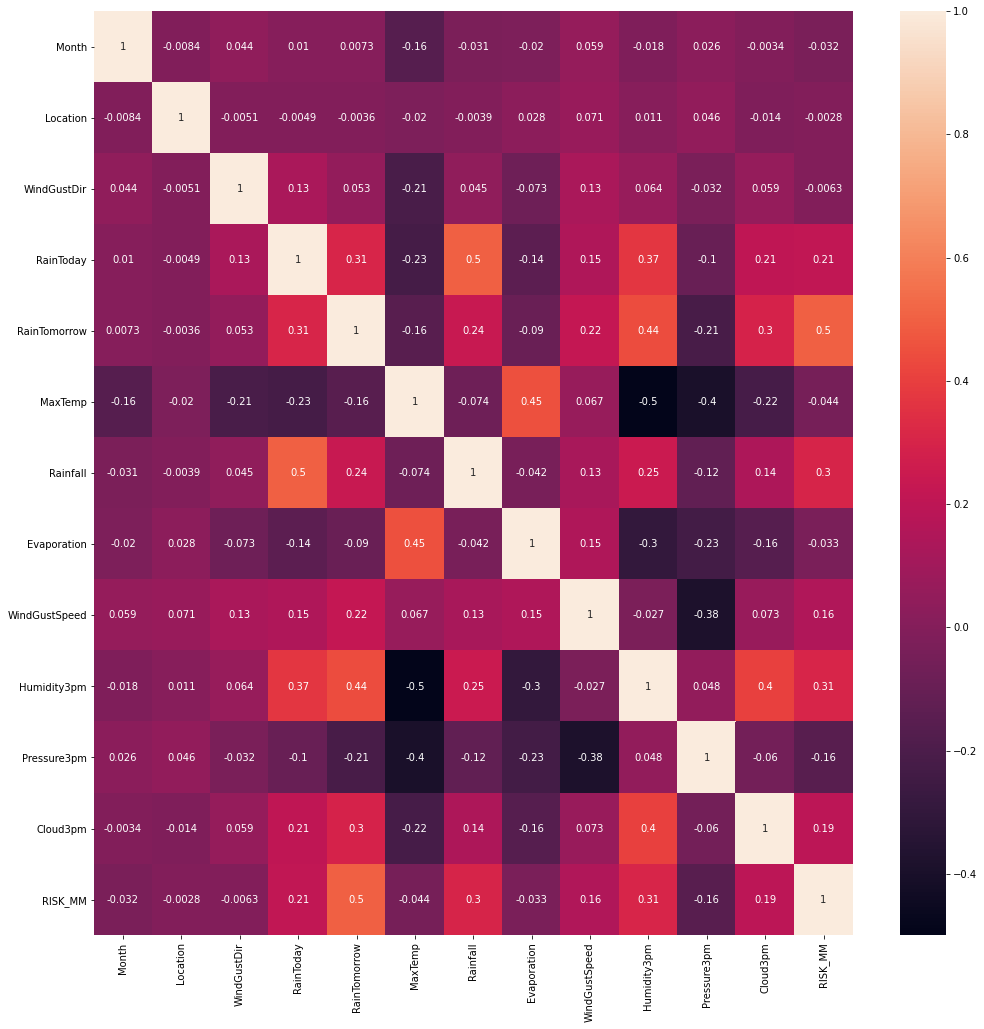

In [15]:
plt.figure(figsize = (17, 17))
sns.heatmap(df_prep.corr(), annot = True)

In [16]:
X = df_prep.drop(['RainTomorrow'], axis=1)
Y = df_prep['RainTomorrow']

from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)


In [17]:
from sklearn.neighbors import KNeighborsClassifier
params = {'n_neighbors': np.arange(1,11)}
KNN = KNeighborsClassifier()
clf_grid = GridSearchCV(KNN, params, scoring='accuracy', refit=True)
clf_grid.fit(X_train, y_train)
best = clf_grid.best_params_['n_neighbors']
print('Наилучшая точность по метрике accuracy при количестве соседей n=', best)

Наилучшая точность по метрике accuracy при количестве соседей n= 7


In [18]:
%%time
Neighbors = KNeighborsClassifier(n_neighbors=best)
Neighbors.fit(X_train, y_train)
prediction = Neighbors.predict(X_test)

CPU times: user 12 s, sys: 74.2 ms, total: 12.1 s
Wall time: 12.2 s


In [19]:
Neighbors_score = pd.DataFrame({'Accuracy': accuracy_score(y_test, prediction),\
                                'Precision': precision_score(y_test, prediction), \
                                'Recall': recall_score(y_test, prediction), \
                                'F1 score': f1_score(y_test, prediction)}, index = ['Neighbors'])

In [20]:
%%time
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(penalty =  'l2', max_iter = 10000, C = 2)
LogReg.fit(X_train, y_train)
prediction = LogReg.predict(X_test)


CPU times: user 3.9 s, sys: 409 ms, total: 4.3 s
Wall time: 1.1 s


In [21]:
Logistic_score = pd.DataFrame({'Accuracy': accuracy_score(y_test, prediction),\
                                'Precision': precision_score(y_test, prediction), \
                                'Recall': recall_score(y_test, prediction), \
                                'F1 score': f1_score(y_test, prediction)}, index = ['LogisticRegression'])

In [22]:
%%time
from sklearn.naive_bayes import  GaussianNB

Bayes = GaussianNB()
Bayes.fit(X_train, y_train)
prediction = Bayes.predict(X_test)


CPU times: user 129 ms, sys: 25.5 ms, total: 155 ms
Wall time: 38.9 ms


In [23]:
Bayes_score = pd.DataFrame({'Accuracy': accuracy_score(y_test, prediction),\
                                'Precision': precision_score(y_test, prediction), \
                                'Recall': recall_score(y_test, prediction), \
                                'F1 score': f1_score(y_test, prediction)}, index = ['Bayes'])

In [24]:
Score = pd.concat([Neighbors_score, Logistic_score, Bayes_score])

## Выводы
Нам удалось построить модель для предсказания дождя в Австрии, основываясь на эмпирическах данных, с помощью моделей наивного Байсе, метода к-ближайших соседей и логистической регрессии. Давайте посмотрим на результаты:
- Как и предполагалось самым долгим и самым неточным методом оказался метод к-ближайших соседей. Предсказание с его помощью очень време- и ресурсозатратно. Точность по accuracy равняется приблизительно 0.87, а время расчета почти 15 секунд, учитывая тот факт, что мы удалили значительный объем признаков -- это очень плохой показатель
- Наилучшим образом по точно себя показал Logistic Regression. Почти на всех метриках точность очень близка к единицы, а на некоторых выборках при определенном случайном разделении достигает 1 по всем метрикам. Однако время обучения составило 1.5 секунды, что относительно неплохо, однако не лучший результат на исследовании
- Наивный байес очень хорошо предсказал почти по всем метрикам и обучился быстрее всех, время его обучения составило 48 мс, что является очень хорошим результатом при наличии ограниченных вычислительных ресурсов 

Результаты точности по метрикам представлены ниже

In [25]:
Score

,Accuracy,Precision,Recall,F1 score
Neighbors,0.874314,0.853977,0.522825,0.648576
LogisticRegression,1.000000,1.000000,1.000000,1.000000
Bayes,0.963571,0.859183,0.999620,0.924096
